# Structure Data and ML Challenge
By Samuel Waweru

## Data Processing

In [2]:
# ImportingLibraries important for Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preping

In [3]:
#Loading Retail Sales Dataset and addressing the missing data appropriately
df_Retail_Sale = pd.read_csv('Resources/retail_sales_data.csv')

# Size of the dataset
print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df_Retail_Sale.head())
# Displaying the last 5 rows of the dataset
print("Last 5 rows of the dataset:")
print(df_Retail_Sale.tail())    


Size of the dataset:  (18250, 13)
First 5 rows of the dataset:
         date store_id     category weather promotion special_event  \
0  2023-01-01  store_1  Electronics   Sunny       NaN         False   
1  2023-01-01  store_1     Clothing   Rainy  Discount         False   
2  2023-01-01  store_1    Groceries   Sunny  Seasonal         False   
3  2023-01-01  store_1   Home Goods   Sunny  Discount         False   
4  2023-01-01  store_1       Beauty   Sunny  Seasonal         False   

  dominant_age_group  num_customers  total_sales  online_sales  \
0              25-34          137.0      1409.76        430.08   
1                55+          116.0      1612.79       1238.71   
2              18-24          120.0      1307.37        168.46   
3                55+          132.0      1756.65        220.98   
4                55+          120.0      1764.91        686.24   

   in_store_sales  avg_transaction  return_rate  
0          979.68            10.29       0.0453  
1          37

In [4]:
# Displaying the columns of the dataset
print("Columns of the dataset:")    
print(df_Retail_Sale.columns)
# Displaying the data types of the columns  
print("Data types of the columns:")
print(df_Retail_Sale.dtypes)
 


Columns of the dataset:
Index(['date', 'store_id', 'category', 'weather', 'promotion', 'special_event',
       'dominant_age_group', 'num_customers', 'total_sales', 'online_sales',
       'in_store_sales', 'avg_transaction', 'return_rate'],
      dtype='object')
Data types of the columns:
date                   object
store_id               object
category               object
weather                object
promotion              object
special_event          object
dominant_age_group     object
num_customers         float64
total_sales           float64
online_sales          float64
in_store_sales        float64
avg_transaction       float64
return_rate           float64
dtype: object


Number of missing values in each column:
date                     0
store_id                 0
category                 0
weather                346
promotion             3881
special_event          382
dominant_age_group     388
num_customers          398
total_sales            358
online_sales           354
in_store_sales         388
avg_transaction        374
return_rate            357
dtype: int64
Percentage of missing values in each column:
date                   0.000000
store_id               0.000000
category               0.000000
weather                1.895890
promotion             21.265753
special_event          2.093151
dominant_age_group     2.126027
num_customers          2.180822
total_sales            1.961644
online_sales           1.939726
in_store_sales         2.126027
avg_transaction        2.049315
return_rate            1.956164
dtype: float64


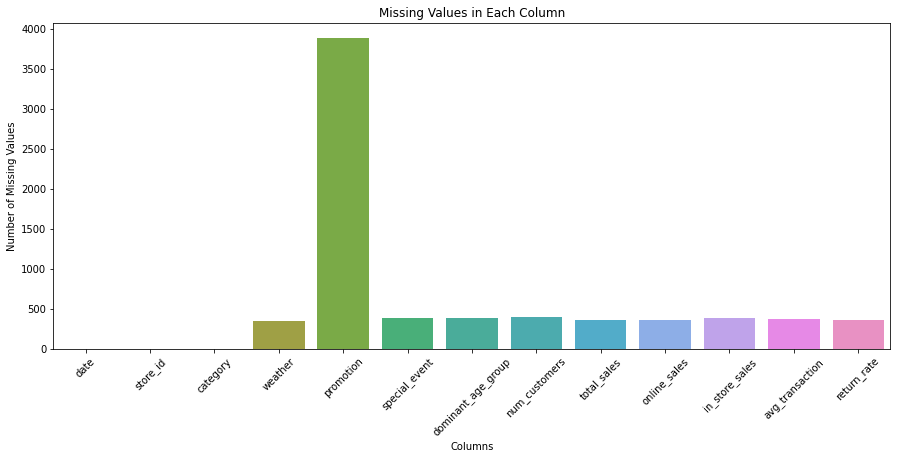

In [5]:
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())
# Displaying the percentage of missing values in each column    
print("Percentage of missing values in each column:")
print(df_Retail_Sale.isnull().sum() / df_Retail_Sale.shape[0] * 100)   
# Displaying the summary of missing values in each column in a bar chart
plt.figure(figsize=(15, 6))
sns.barplot(x=df_Retail_Sale.isnull().sum().index, y=df_Retail_Sale.isnull().sum().values)
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()



In [6]:
cols_to_consider = ['weather', 'special_event', 'dominant_age_group', 'num_customers', 
                    'total_sales', 'online_sales', 'in_store_sales', 'avg_transaction', 'return_rate']

df_Retail_Sale = df_Retail_Sale.dropna(subset=cols_to_consider)

# Size of the dataset
print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())

Size of the dataset:  (15141, 13)
Number of missing values in each column:
date                     0
store_id                 0
category                 0
weather                  0
promotion             3224
special_event            0
dominant_age_group       0
num_customers            0
total_sales              0
online_sales             0
in_store_sales           0
avg_transaction          0
return_rate              0
dtype: int64


In [7]:
non_null_promotions = df_Retail_Sale['promotion'].dropna()
df_Retail_Sale.loc[df_Retail_Sale['promotion'].isnull(), 'promotion'] = np.random.choice(non_null_promotions, size=df_Retail_Sale['promotion'].isnull().sum())

# Check if everything is clean
print(df_Retail_Sale.isnull().sum())

# Size of the dataset
print("Size of the dataset: ", df_Retail_Sale.shape)
# Displaying the number of missing values in each column
print("Number of missing values in each column:")
print(df_Retail_Sale.isnull().sum())

date                  0
store_id              0
category              0
weather               0
promotion             0
special_event         0
dominant_age_group    0
num_customers         0
total_sales           0
online_sales          0
in_store_sales        0
avg_transaction       0
return_rate           0
dtype: int64
Size of the dataset:  (15141, 13)
Number of missing values in each column:
date                  0
store_id              0
category              0
weather               0
promotion             0
special_event         0
dominant_age_group    0
num_customers         0
total_sales           0
online_sales          0
in_store_sales        0
avg_transaction       0
return_rate           0
dtype: int64


In [8]:
# Feature Engineering
df_Retail_Sale['date'] = pd.to_datetime(df_Retail_Sale['date'])
df_Retail_Sale['day_of_week'] = df_Retail_Sale['date'].dt.dayofweek
df_Retail_Sale['month'] = df_Retail_Sale['date'].dt.month
df_Retail_Sale['day'] = df_Retail_Sale['date'].dt.day

### EDA

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
# Exploratory Data Analysis (EDA)
df_Retail_Sale.describe(include='all')

C:\Users\hp\AppData\Local\Temp/ipykernel_8088/2311108833.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_Retail_Sale.describe(include='all')


,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,month,day
count,15141,15141,15141,15141,15141,15141,15141,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000,15141.000000
unique,365,10,5,5,4,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-08-12 00:00:00,store_7,Electronics,Sunny,Flash Sale,False,45-54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,49,1535,3076,3078,3904,14393,3110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2023-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.249455,1312.191086,526.535368,785.655712,12.487047,0.049921,3.015257,6.507166,15.756687
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.368138,419.130396,322.926144,370.763569,3.313266,0.020034,2.002401,3.440804,8.805725
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.000000,256.150000,2.000000,13.260000,2.830000,-0.026900,0.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.000000,1015.850000,286.660000,517.010000,10.130000,0.036300,1.000000,4.000000,8.000000


In [11]:
# Make a copy to avoid touching original
df_Retail_Sale = df_Retail_Sale.copy()

# Identify categorical columns
cat_cols = df_Retail_Sale.select_dtypes(include='object').columns

# Apply Label Encoding
le = LabelEncoder()

for col in cat_cols:
    df_Retail_Sale[col] = le.fit_transform(df_Retail_Sale[col].astype(str))

In [12]:

# Select only continuous features to scale
scale_cols = ['total_sales', 'in_store_sales', 'online_sales', 'avg_transaction', 'return_rate', 'num_customers']

scaler = StandardScaler()
df_Retail_Sale = df_Retail_Sale.copy()
df_Retail_Sale[scale_cols] = scaler.fit_transform(df_Retail_Sale[scale_cols])


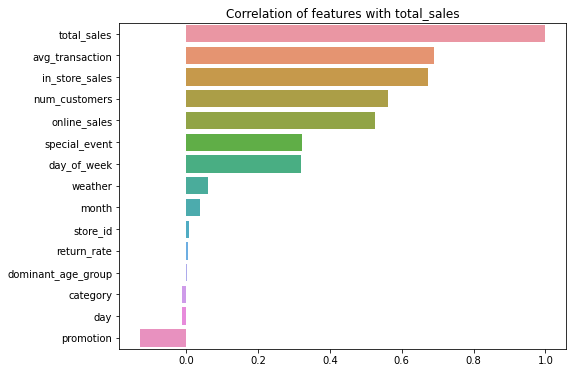

In [13]:
target = 'total_sales'

corr_with_target = df_Retail_Sale.corr()[target].sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title(f"Correlation of features with {target}")
plt.show()

## Sales Forecasting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [16]:
# Select features and target
features = ['store_id', 'category', 'weather', 'promotion', 'special_event',
            'dominant_age_group', 'num_customers', 'online_sales', 'in_store_sales',
            'avg_transaction', 'return_rate', 'day_of_week', 'month', 'day']

target = 'total_sales'

X = df_Retail_Sale[features]
y = df_Retail_Sale[target]

In [ ]:
X[['num_customers', 'online_sales', 'in_store_sales', 'avg_transaction', 'return_rate']] = scaler.fit_transform(
    X[['num_customers', 'online_sales', 'in_store_sales', 'avg_transaction', 'return_rate']]
)

# 🧪 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🏗️ 5. Build Model
model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [18]:
# Prepare future dates
future_dates = pd.date_range(start='2024-01-01', periods=14)

# Create combinations of store_id and category
store_categories = df_Retail_Sale[['store_id', 'category']].drop_duplicates()

# Build future dataframe
future_df = pd.DataFrame()

for date in future_dates:
    temp = store_categories.copy()
    temp['date'] = date
    future_df = pd.concat([future_df, temp], ignore_index=True)

# Feature engineering
future_df['day_of_week'] = future_df['date'].dt.dayofweek
future_df['month'] = future_df['date'].dt.month
future_df['day'] = future_df['date'].dt.day

# Fill other columns with reasonable default values
future_df['weather'] = df_Retail_Sale['weather'].mode()[0]  # fill with mode
future_df['promotion'] = df_Retail_Sale['promotion'].mode()[0]  # fill with mode
future_df['special_event'] = 'None'
future_df['dominant_age_group'] = df_Retail_Sale['dominant_age_group'].mode()[0]

# Numeric features: fill with median values
future_df['num_customers'] = df_Retail_Sale['num_customers'].median()
future_df['online_sales'] = df_Retail_Sale['online_sales'].median()
future_df['in_store_sales'] = df_Retail_Sale['in_store_sales'].median()
future_df['avg_transaction'] = df_Retail_Sale['avg_transaction'].median()
future_df['return_rate'] = df_Retail_Sale['return_rate'].median()


In [20]:
future_df.head(15)

,store_id,category,date,day_of_week,month,day,weather,promotion,special_event,dominant_age_group,num_customers,online_sales,in_store_sales,avg_transaction,return_rate
0,0,2,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
1,0,1,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
2,0,3,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
3,0,4,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
4,0,0,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
5,2,2,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
6,2,1,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
7,2,3,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
8,2,4,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048
9,3,2,2024-01-01,0,1,1,2,2,None,3,-0.174391,-0.180033,-0.127351,-0.080602,-0.001048


In [22]:
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.02
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.05
R² Score: 1.00


## Customer Segmentation

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [27]:
store_features = df_Retail_Sale.groupby('store_id').agg({
    'num_customers': 'mean',
    'online_sales': 'mean',
    'in_store_sales': 'mean',
    'avg_transaction': 'mean',
    'return_rate': 'mean'
}).reset_index()

store_features.head()

,store_id,num_customers,online_sales,in_store_sales,avg_transaction,return_rate
0,0,-0.005708,-0.002026,0.004754,0.011311,0.013960
1,1,-0.016119,-0.022026,-0.024399,-0.029547,0.056216
2,2,0.008714,-0.011065,0.006640,-0.016679,-0.053404
3,3,-0.009641,-0.018728,0.003100,-0.010899,0.035377
4,4,0.007693,0.012708,0.050739,0.055050,-0.002579


In [28]:
scaler = StandardScaler()
store_scaled = scaler.fit_transform(store_features.drop('store_id', axis=1))

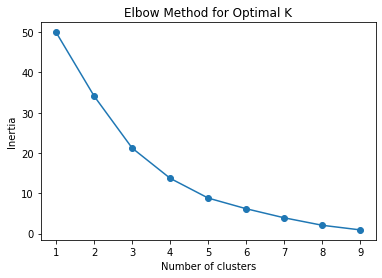

In [29]:
# Elbow Method
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(store_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [30]:
# Let's say elbow showed 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
store_features['cluster'] = kmeans.fit_predict(store_scaled)

store_features.head()


,store_id,num_customers,online_sales,in_store_sales,avg_transaction,return_rate,cluster
0,0,-0.005708,-0.002026,0.004754,0.011311,0.013960,0
1,1,-0.016119,-0.022026,-0.024399,-0.029547,0.056216,0
2,2,0.008714,-0.011065,0.006640,-0.016679,-0.053404,2
3,3,-0.009641,-0.018728,0.003100,-0.010899,0.035377,0
4,4,0.007693,0.012708,0.050739,0.055050,-0.002579,1


In [31]:
store_features.groupby('cluster').mean()

,store_id,num_customers,online_sales,in_store_sales,avg_transaction,return_rate
cluster,,,,,,
0,2.500000,-0.016938,-0.012775,-0.009581,-0.005897,0.031443
1,7.000000,0.011924,0.007831,0.032552,0.031276,0.012909
2,4.666667,0.010937,0.009038,-0.019481,-0.023491,-0.055232
